<a href="https://colab.research.google.com/github/mizykk/Basic/blob/master/Iris_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris
- Classification  
  
    
    
### 데이터 불러오기

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
# Iris data의 key
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
# dataset에 대한 간략한 설명(Describe)
print(iris['DESCR'][:193] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [ ]:
# 예측 대상 target의 이름
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Iris Data

In [ ]:
iris['data'].shape

(150, 4)

In [ ]:
# 특성(feature)
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris['data'][:5]   #data의 상위 5개만 출력

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Data Hold-Out(Cross Validation)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], test_size = 0.2, random_state = 3) 

In [ ]:
print("X_train 크기:", X_train.shape)
print("y_train 크기:", y_train.shape, "\n")

print("X_test 크기:", X_test.shape)
print("y_test 크기:", y_test.shape)

X_train 크기: (120, 4)
y_train 크기: (120,) 

X_test 크기: (30, 4)
y_test 크기: (30,)


### Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Exploratory Data Analysis

In [ ]:
import pandas as pd

# X_train을 데이터프레임으로
iris_df = pd.DataFrame(X_train, columns = iris['feature_names'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b86ac7630>,
      dtype=object)

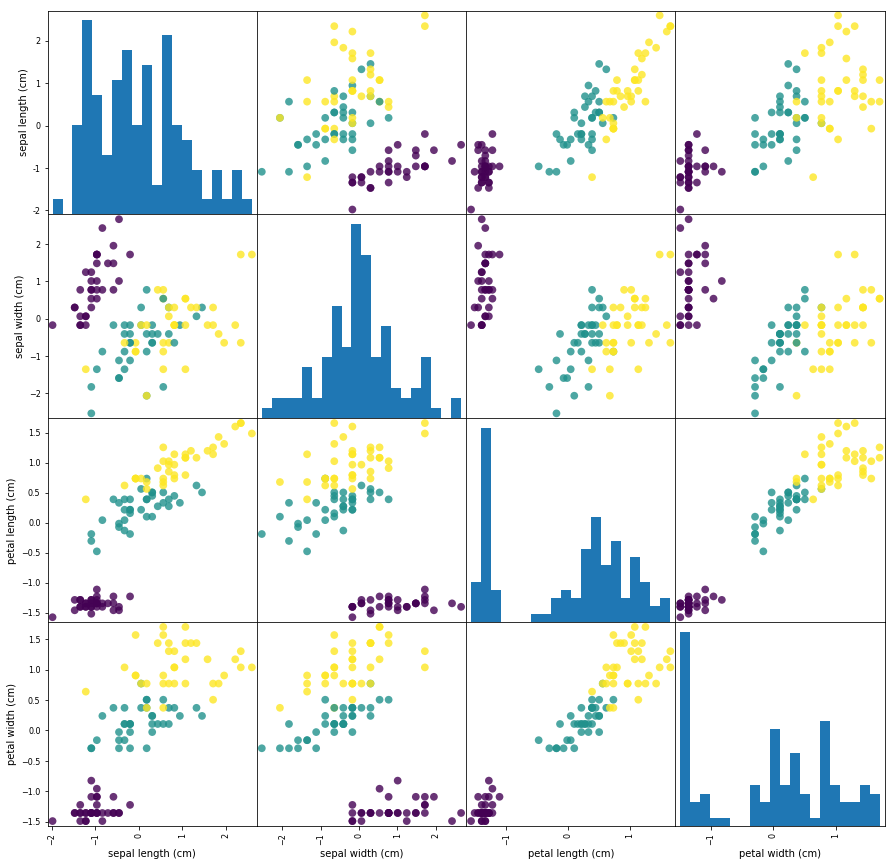

In [ ]:
pd.plotting.scatter_matrix(iris_df, c = y_train, figsize = (15, 15), marker = 'o',
                          hist_kwds = {'bins' : 20}, s = 60, alpha = .8)

### Linear Regression

In [ ]:
# Stochastic Gradient Descent 확률적 기울기 강하법
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier()
clf.fit(X_train, y_train)
print("Test set에 대한 예측값 : \n {}".format(clf.predict(X_test)))
print("Test set 정확도 : {:.2f}".format(clf.score(X_test, y_test)))

Test set에 대한 예측값 : 
 [0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 1 2 2 0 2 2 2 1 0 2 1 1 1 1]
Test set 정확도 : 0.97


### K-nearest Neighbors, K-NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [ ]:
# predict target
y_pred = knn.predict(X_test)
print("Test set에 대한 예측값 : \n {}".format(y_pred))

# 모델의 정확도 계산
print("Test set의 정확도 : \n {:.2f}".format(knn.score(X_test, y_test)))

Test set에 대한 예측값 : 
 [0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 1 2 2 0 2 2 2 1 0 2 1 1 1 1]
Test set의 정확도 : 
 0.97


In [ ]:
from sklearn.model_selection import train_test_split
X_trian, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], test_size = 0.2, random_state = 3)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
print("Test set 정확도 : {:.2f}".format(knn.score(X_test, y_test)))

Test set 정확도 : 0.96
